In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Flight Price:

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
df=pd.read_excel('flight_price.xlsx')
rows,columns=df.shape
print("Columns=",columns)
print("Rows=",rows)
df.head()

Columns= 11
Rows= 10683


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

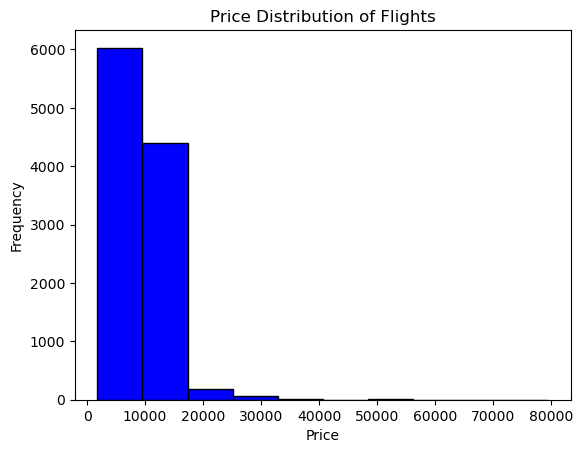

In [3]:
price_data = df["Price"]

plt.hist(price_data, bins=10, color='blue', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution of Flights")
plt.show()


## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [4]:
price_data = df["Price"]
minimum_price = price_data.min()
maximum_price = price_data.max()

price_range = maximum_price - minimum_price

print(f"Minimum Price: ${minimum_price:.2f}")
print(f"Maximum Price: ${maximum_price:.2f}")
print(f"Price Range: ${price_range:.2f}")


Minimum Price: $1759.00
Maximum Price: $79512.00
Price Range: $77753.00


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

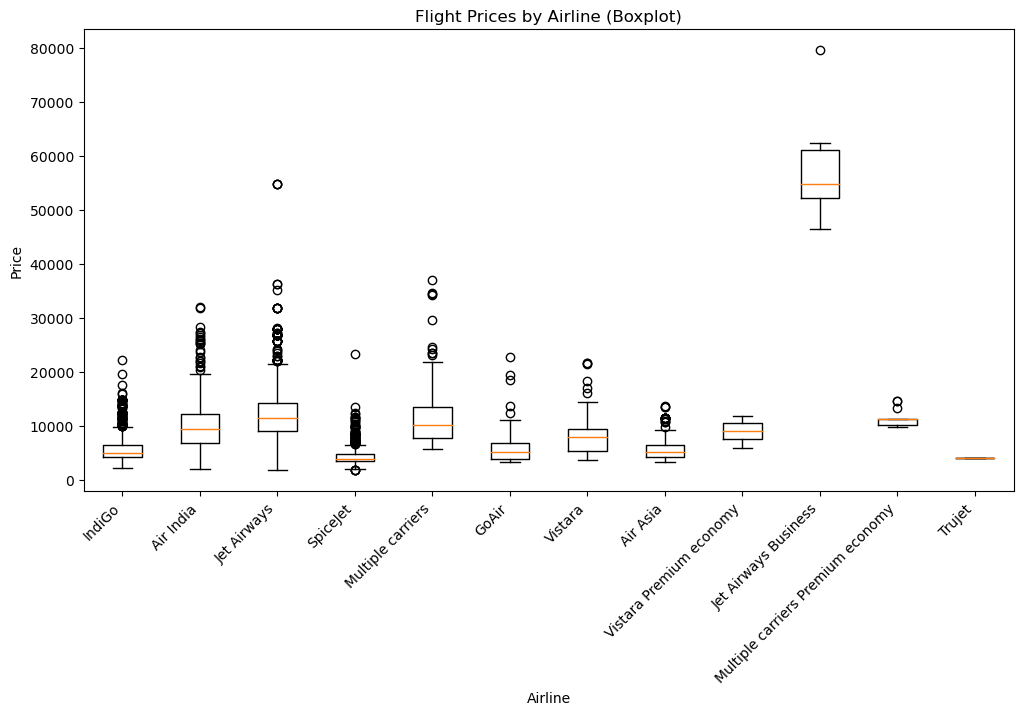

In [5]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha="right")  

plt.boxplot([df[df["Airline"] == airline]["Price"] for airline in df["Airline"].unique()],labels=df["Airline"].unique())

plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Flight Prices by Airline (Boxplot)")
plt.show()

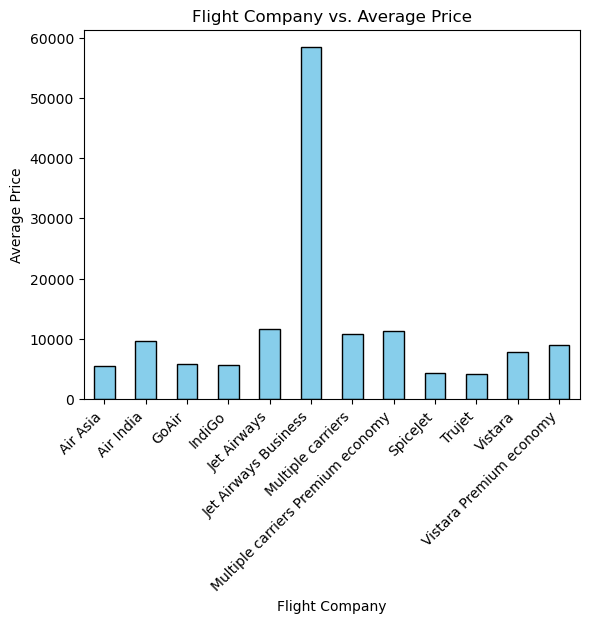

In [6]:
company_prices = df.groupby('Airline')['Price'].mean()

company_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Flight Company")
plt.ylabel("Average Price")
plt.title("Flight Company vs. Average Price")

plt.xticks(rotation=45, ha="right")
plt.show()

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

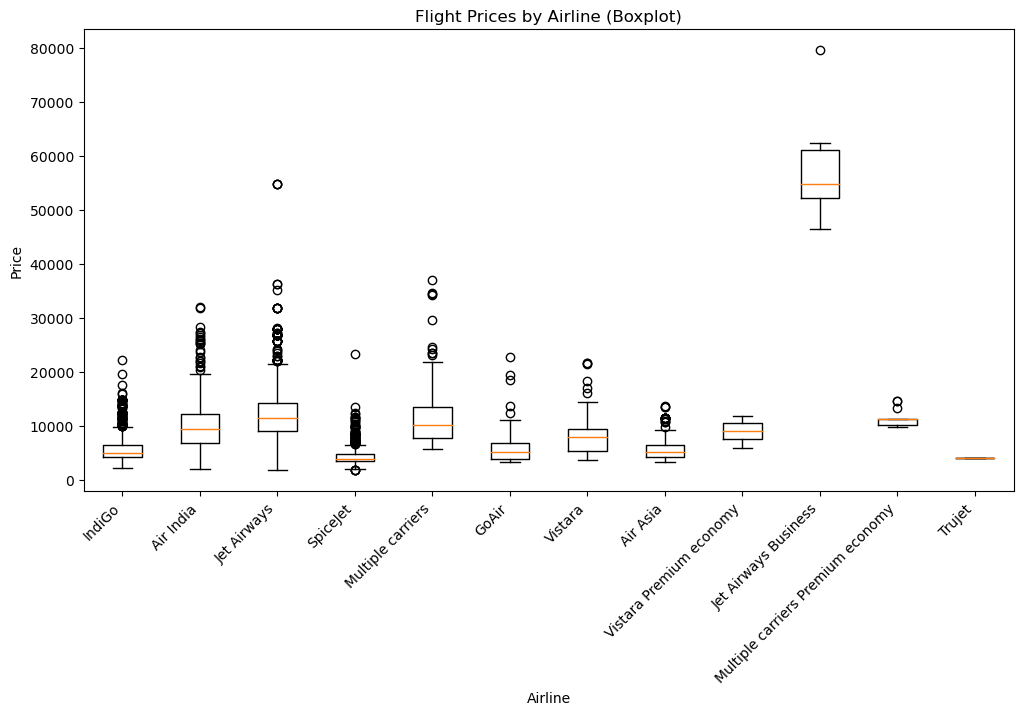

In [7]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha="right")  

plt.boxplot([df[df["Airline"] == airline]["Price"] for airline in df["Airline"].unique()],labels=df["Airline"].unique())

plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Flight Prices by Airline (Boxplot)")
plt.show()

### There is a outlier in Price of tickets i.e. in 
**Jet Airways Business ~$80,000**

**Jet Airways ~$55,000**

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

#### Firstly we have to create a specific column of months of journey then create a visualisation of months and number of journey.

In [8]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [9]:
df['Month'].unique()

array([3, 5, 6, 4])

In [10]:
month_mapping = {3: 'March', 4: 'April', 5: 'May', 6: 'June'}
df['Month']=df['Month'].map(month_mapping)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,March,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,May,2019


In [11]:
journeys_per_month = df['Month'].value_counts()
journeys_per_month

May      3466
June     3414
March    2724
April    1079
Name: Month, dtype: int64

<BarContainer object of 4 artists>

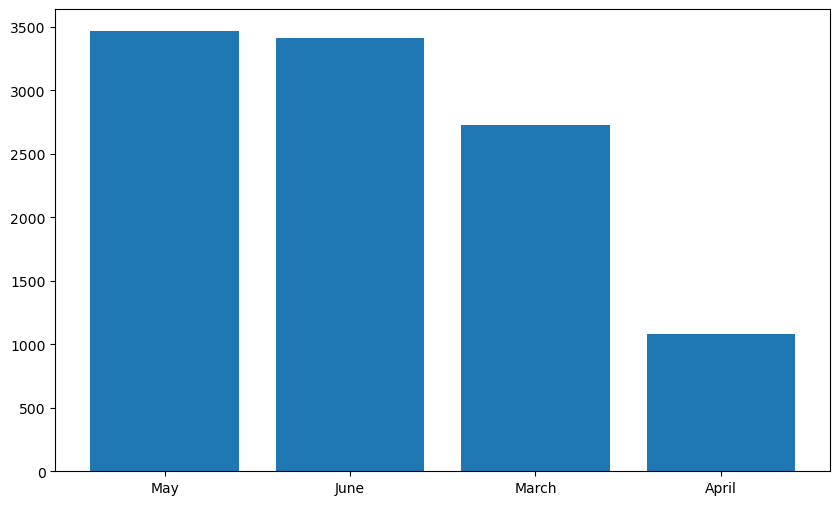

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(journeys_per_month.index, journeys_per_month.values)

**Result**
- Peak travel Season is May and almost June.
- Least travelling Season is April

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

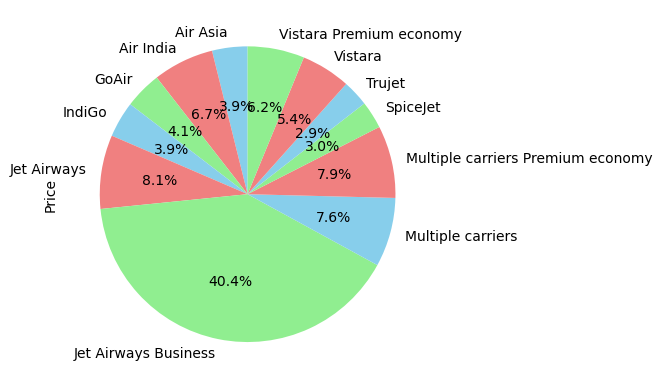

In [13]:
company_prices = df.groupby('Airline')['Price'].mean()

company_prices.plot(kind='pie', colors=['skyblue', 'lightcoral', 'lightgreen'], autopct='%1.1f%%', startangle=90)
plt.show()

**Result**
- The most high price of ticket is of *Jet Airways Business* which is 40.4% to others.
- The least price of ticket is of *Trujet* which is 2.9%

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [14]:
df['Duration_hours']=df['Duration'].str.split(' ').str[0].str.split('h').str[0].str.split('m').str[0]
df['Duration_mins']=df['Duration'].str.split(' ').str[1].str.split('h').str[0].str.split('m').str[0]

#replace NaN values of min with 0
df['Duration_mins'].fillna(0, inplace=True)

df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)
df.drop('Duration',axis=1,inplace=True)


In [15]:
df['Duration_min']=(df['Duration_hours']* 60)+df['Duration_mins']
df.drop('Duration_mins',axis=1,inplace=True)
df.drop('Duration_hours',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,March,2019,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,May,2019,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,June,2019,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,May,2019,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,March,2019,285


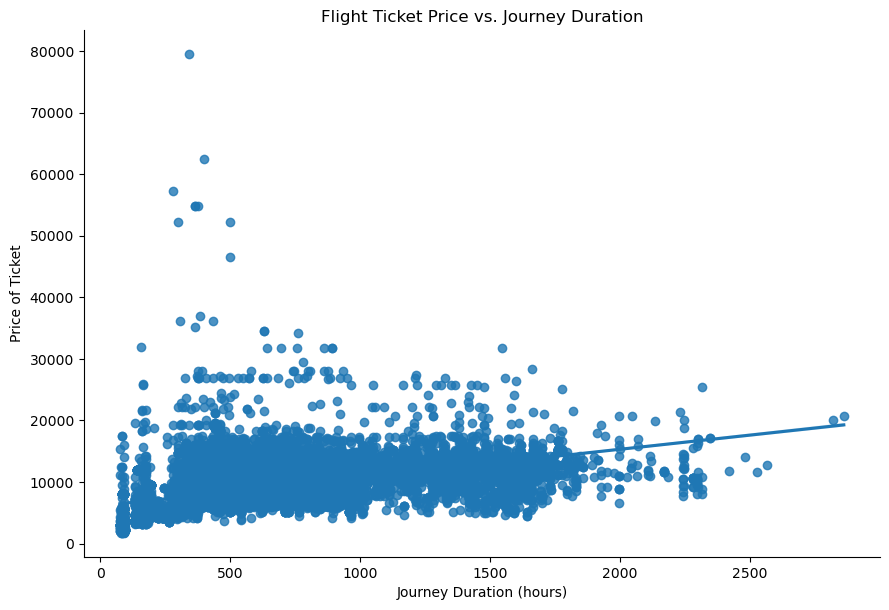

In [16]:
import seaborn as sns

sns.lmplot(x='Duration_min', y='Price', data=df, height=6, aspect=1.5)
plt.xlabel('Journey Duration (hours)')
plt.ylabel('Price of Ticket')
plt.title('Flight Ticket Price vs. Journey Duration')
plt.show()


# Google Playstore:

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [17]:
df=pd.read_csv('googleplaystore.csv')
rows,columns=df.shape
print("Columns=",columns)
print("Rows=",rows)
df.head()

Columns= 13
Rows= 10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [18]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,1,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,1,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,4,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,1,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


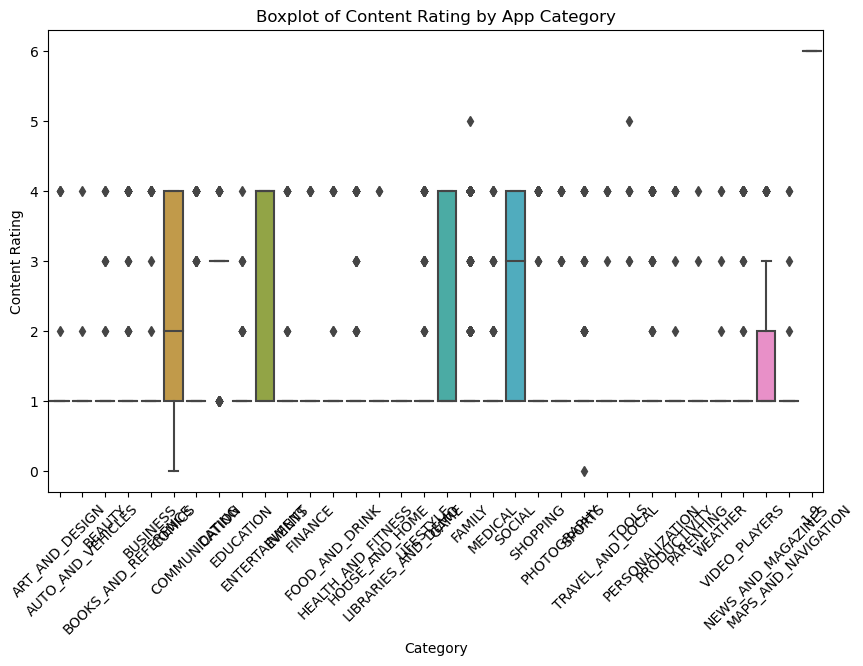

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Category'], y=df['Content Rating'], data=df)

plt.xlabel('Category')
plt.ylabel('Content Rating')
plt.title('Boxplot of Content Rating by App Category')

plt.xticks(rotation=45)
plt.show()

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [21]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**There are 1474 missing values in Rating feature, 1 in Type feature, 8 in Current Ver and 3 in Android Ver**
- Rating feature would make the prediction less efficient else other features would not impact any much as there are very less missing values


## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [22]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [23]:
(df[df['Size']=='1,000+'])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,6,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
df['Size']=df['Size'].str.replace('M','000')

df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,1,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7000,"5,000,000+",Free,0,1,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,4,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8000,"100,000+",Free,0,1,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df=df.drop(df.index[10472])
df['Size']=df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

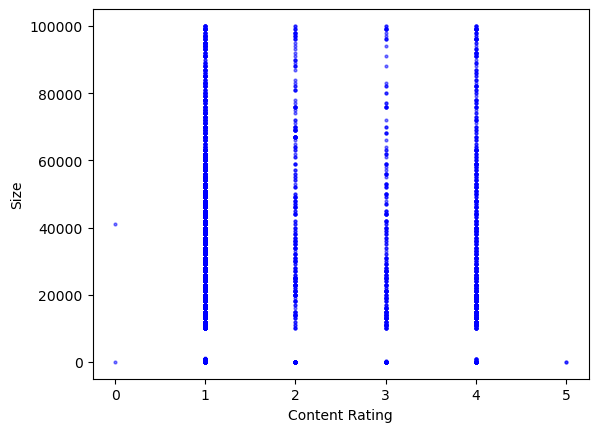

In [26]:
plt.scatter(df['Content Rating'], df['Size'],s=4, c='blue', alpha=0.5)
plt.xlabel("Content Rating")
plt.ylabel("Size")
plt.show()

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [27]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [28]:
df['Price']=df['Price'].str.replace('$','')
df['Price'].unique()

C:\Users\Mohit Singh\AppData\Local\Temp\ipykernel_19828\3657629967.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [29]:
df['Price']=df['Price'].astype(float)
df['Price'].dtype

dtype('float64')

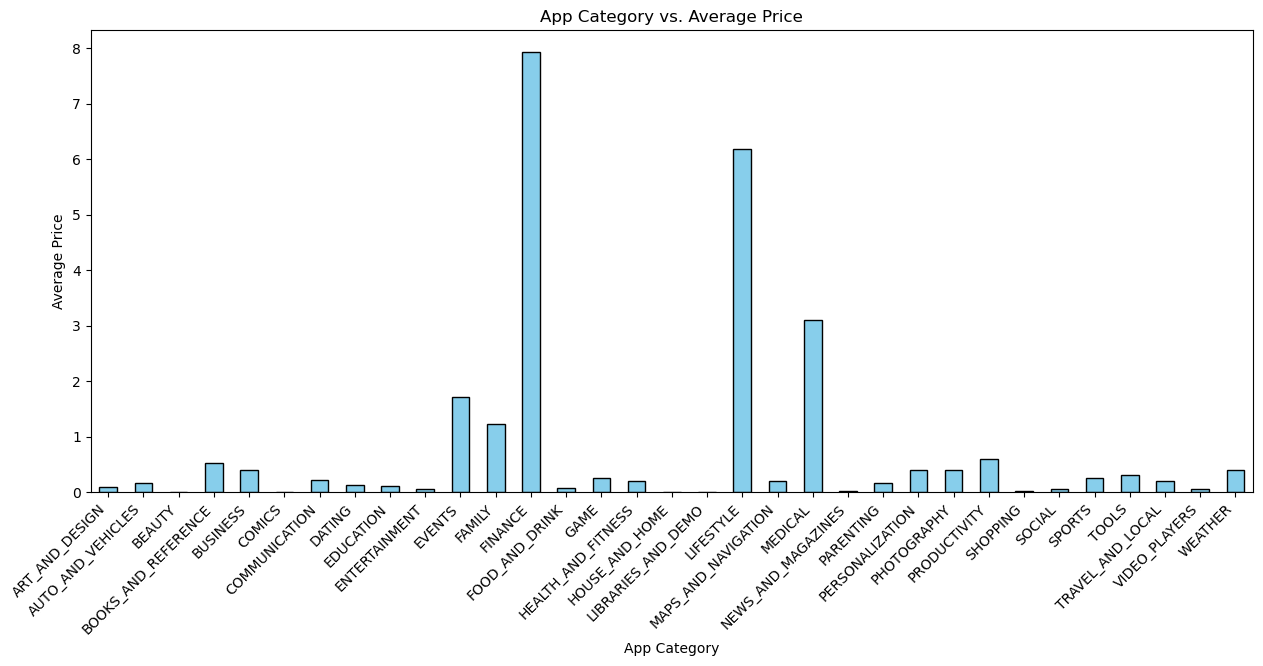

In [30]:
plt.figure(figsize=(15, 6))

app_prices = df.groupby('Category')['Price'].mean()

app_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("App Category")
plt.ylabel("Average Price")
plt.title("App Category vs. Average Price")

plt.xticks(rotation=45, ha="right")
plt.show()

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [31]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [32]:
df['Installs']=df['Installs'].str.replace(',','')
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].astype(int)
df['Installs'].dtype

C:\Users\Mohit Singh\AppData\Local\Temp\ipykernel_19828\3590299405.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace('+','')


dtype('int32')

In [33]:
# Group the data by "App Name" and sum the installs for each app
app_installs = df.groupby("App")["Installs"].sum().reset_index()

# Sort the DataFrame by installs in descending order
app_installs = app_installs.sort_values(by="Installs", ascending=False)

top_10_apps=app_installs.head(10)
top_10_apps.reset_index(drop=True, inplace=True)
top_10_apps

,App,Installs
0,Subway Surfers,6000000000
1,Google News,4000000000
2,Hangouts,4000000000
3,Google Drive,4000000000
4,Google Photos,4000000000
5,Instagram,4000000000
6,Candy Crush Saga,3500000000
7,Maps - Navigate & Explore,3000000000
8,Google Chrome: Fast & Secure,3000000000
9,WhatsApp Messenger,3000000000


## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

**The most popular app categories could be found by analysing the relation between app *Category* and their *Installs* i.e. it describes which app category is installed the most and the same category would be popular**

In [34]:
cat_installs = df.groupby("Category")["Installs"].sum().reset_index()

cat_installs = cat_installs.sort_values(by="Installs", ascending=False)

cat_installs.head(10)


,Category,Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452771915
11,FAMILY,10258263505
24,PHOTOGRAPHY,10088247655
21,NEWS_AND_MAGAZINES,7496317760
30,TRAVEL_AND_LOCAL,6868887146
31,VIDEO_PLAYERS,6222002720


**Above table shows the popularity of App Category in descending order which shows that, GAME Category is most popular over playstore , So the company should launch a Game to get easily upsacled.**

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,1,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,1,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,4,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,1,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### We don't have proper features in dataset to get this answer solved,
**Still** we can analyse the app category which is most successful by looking over thier ratings


In [36]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [37]:
df['Rating']=df['Rating'].replace('nan',np.nan)
df['Installs']=df['Installs'].astype(float)
df['Rating'].dtype

dtype('float64')

In [38]:
cat = df.groupby("Category")["Rating"].mean().reset_index()

cat = cat.sort_values(by="Rating", ascending=False)

cat.head(10)


,Category,Rating
10,EVENTS,4.435556
8,EDUCATION,4.389032
0,ART_AND_DESIGN,4.358065
3,BOOKS_AND_REFERENCE,4.346067
23,PERSONALIZATION,4.335987
22,PARENTING,4.300000
14,GAME,4.286326
2,BEAUTY,4.278571
15,HEALTH_AND_FITNESS,4.277104
26,SHOPPING,4.259664


**Events Category has the most successful app developers.**

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [39]:
df['Updated_month']=df['Last Updated'].str.split(' ').str[0]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Updated_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,1,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,1,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,4,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,1,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June


In [40]:
pd.crosstab(index=df['Updated_month'], columns='count').sort_values(by="count", ascending=False)

col_0,count
Updated_month,
July,3163
August,1594
June,1273
May,978
March,667
April,616
February,533
January,491
December,426


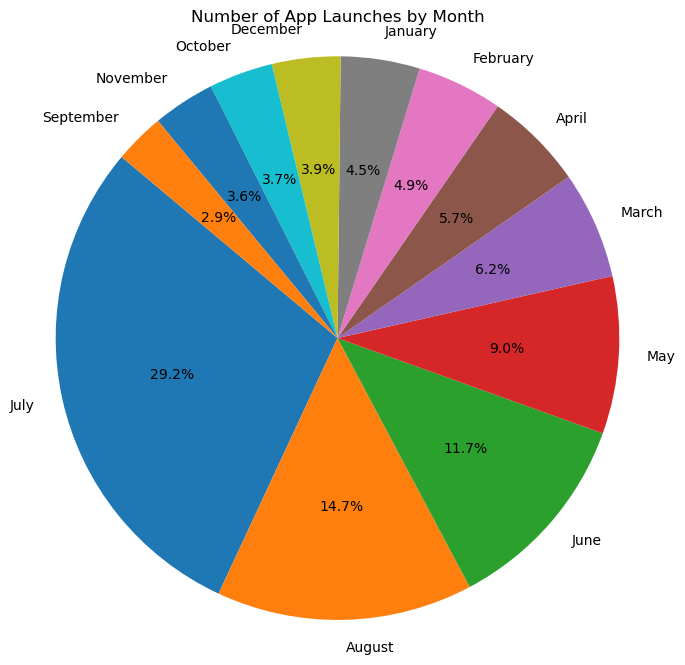

In [41]:
# Count the number of launches in each month
launch_counts = df["Updated_month"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(launch_counts, labels=launch_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Number of App Launches by Month")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


## **Analysing the no. of Apps Updated in a month we get to know that most of the apps as updated in July, So, the firm should launch the App in month of July**